## PCA

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
# from wpca import PCA
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing


sns.set_style('darkgrid')
%matplotlib inline

In [2]:
X = pd.read_csv('../project_dataset/partial_dataset_train/features.csv', index_col=0)
X = X[:30000]

y = pd.read_csv('../project_dataset/partial_dataset_train/labels.csv', index_col=0)
y = y[:30000]

In [3]:
# scaling the values
# std_scale = preprocessing.RobustScaler(unit_variance=True).fit(X)
std_scale = preprocessing.PowerTransformer().fit(X)
# std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [4]:
X_scaled.shape

(30000, 952)

In [5]:
# plt.plot(X_scaled[:5], c='black');

In [11]:
# def plot_results(PCA, X_scaled, weights=None, ncomp=2):
#     # Compute the standard/weighted PCA
#     if weights is None:
#         kwds = {}
#     else:
#         kwds = {'weights': weights}
    
#     # Compute the PCA vectors & variance
#     pca = PCA(n_components=10).fit(X_scaled, **kwds)
    
        
#     # Create the plots
#     fig, ax = plt.subplots(2, 2, figsize=(16, 6))
    
#     ax[0, 0].plot(X[:10].T, c='black', lw=1)
#     #ax[1, 1].plot(Y[:10].T, c='black', lw=1)
    
#     ax[0, 1].plot(pca.components_[:ncomp].T, c='black')
    
#     ax[1, 0].plot(np.arange(1, 11), pca.explained_variance_ratio_)
#     ax[1, 0].set_xlim(1, 10)
#     ax[1, 0].set_ylim(0, None)
    
#     ax[0, 0].xaxis.set_major_formatter(plt.NullFormatter())
#     ax[0, 1].xaxis.set_major_formatter(plt.NullFormatter())
    
#     ax[0, 0].set_title('Input Data')
#     ax[0, 1].set_title('First {0} Principal Vectors'.format(ncomp))
#     ax[1, 0].set_title('PCA variance ratio')
#     ax[1, 0].set_xlabel('principal vector')
#     ax[1, 0].set_ylabel('proportion of total variance')
    
#     fig.suptitle(PCA.__name__, fontsize=16)

In [6]:
# plot_results(PCA, X_scaled);

In [7]:
n_comps=20
pca = decomposition.PCA(n_components=n_comps)
pca.fit(X_scaled)

PCA(n_components=20)

In [8]:
pca.components_

array([[ 0.01475485,  0.01718488, -0.00511557, ...,  0.02383024,
         0.0662461 ,  0.0833615 ],
       [-0.07709265, -0.07167138,  0.0039343 , ...,  0.07228793,
        -0.03770678, -0.00858669],
       [-0.10176072, -0.04394365,  0.11839923, ...,  0.0819013 ,
        -0.0759564 , -0.0413422 ],
       ...,
       [ 0.02284493,  0.03287975, -0.03115756, ...,  0.0302526 ,
         0.02710808,  0.03004009],
       [ 0.02654399, -0.04213532, -0.07820169, ...,  0.02147233,
        -0.02995369, -0.02317963],
       [-0.01470402,  0.08331635,  0.05879395, ..., -0.0103606 ,
        -0.00332572,  0.01605491]])

In [9]:
# project X on principal components
X_projected = pca.transform(X_scaled)

In [23]:
X_projected.shape

(30000, 20)

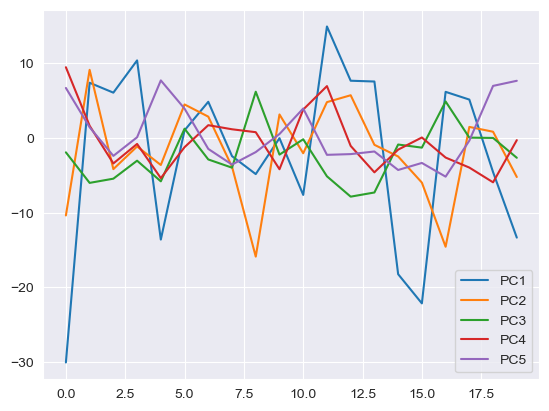

In [10]:
plt.plot(X_projected[:20, :5]);
plt.legend([f"PC{i}" for i in range(1, n_comps+1)])

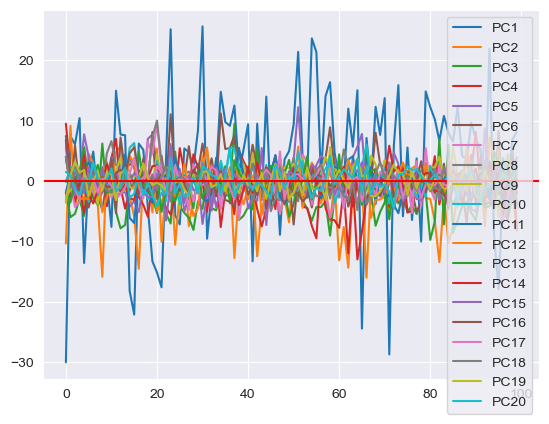

In [11]:
plt.plot(X_projected[:100])
plt.legend([f"PC{i}" for i in range(1, n_comps+1)])
plt.axhline(color='red')

### Correlation coefficient between original variables and the component

In [12]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
#loadings_df
pca_top = loadings_df.abs().nlargest(150, [f"PC{i}" for i in range(1, n_comps+1)])
#.sort_values([f"PC{i}" for i in range(1, n_comps+1)], ascending=False).iloc[:100, :]

In [13]:
pca_top

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
variable,,,,,,,,,,,,,,,,,,,,
C6-1,0.094364,0.004809,0.011708,0.003995,0.007269,0.010671,0.001989,0.005817,0.001834,0.000830,0.004166,0.006603,0.004030,0.001637,0.012559,0.004071,0.000741,0.007088,0.000861,0.004428
C8-2,0.094335,0.003938,0.003142,0.002032,0.001480,0.008251,0.001714,0.012962,0.000167,0.009476,0.000162,0.014762,0.006943,0.004110,0.015183,0.000028,0.007579,0.008801,0.000276,0.001722
C8-7,0.094212,0.009569,0.007833,0.004827,0.008654,0.009908,0.000395,0.009083,0.005812,0.004656,0.007104,0.005153,0.006110,0.004854,0.014303,0.007331,0.000796,0.006502,0.000571,0.005174
C8-37,0.094192,0.006703,0.008571,0.004005,0.005167,0.007882,0.000530,0.010709,0.001983,0.000202,0.009092,0.000131,0.002618,0.005126,0.021151,0.003411,0.002911,0.007367,0.003650,0.006918
C8-78,0.093963,0.001661,0.000590,0.014251,0.019018,0.005164,0.006807,0.009376,0.000374,0.010970,0.003344,0.004034,0.007484,0.003574,0.020756,0.000035,0.002500,0.013397,0.000679,0.005198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3-162,0.025281,0.007810,0.013260,0.006403,0.014822,0.025878,0.037792,0.050117,0.009329,0.015269,0.000550,0.011574,0.013063,0.007152,0.042635,0.008978,0.038412,0.058459,0.004927,0.042438
C3-256,0.025280,0.001936,0.013932,0.012713,0.025485,0.011519,0.000124,0.014335,0.005401,0.021738,0.063571,0.040280,0.020679,0.002042,0.005583,0.067875,0.006473,0.000839,0.015825,0.006120
C3-150,0.025267,0.000210,0.010079,0.019134,0.035275,0.010031,0.007218,0.062529,0.028280,0.028655,0.035965,0.038248,0.003056,0.012151,0.046070,0.029545,0.029873,0.040879,0.016229,0.015040


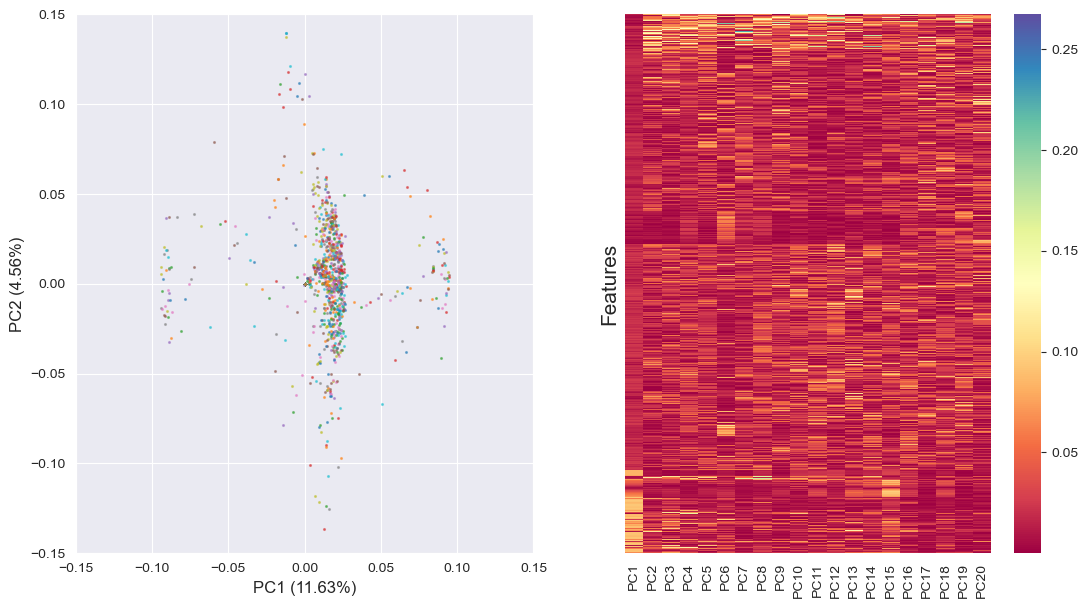

In [26]:
plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
pcs = pca.components_

plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)", fontsize=12)
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)", fontsize=12)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    plt.scatter([0, x], [0, y], s=1.5, alpha=0.5)

plt.subplot(1, 2, 2)
ax = sns.heatmap(loadings_df.abs(), annot=False, cmap='Spectral')
plt.yticks([])
plt.ylabel("Features", fontsize=15)
plt.savefig("../images/pca.png")
plt.show()

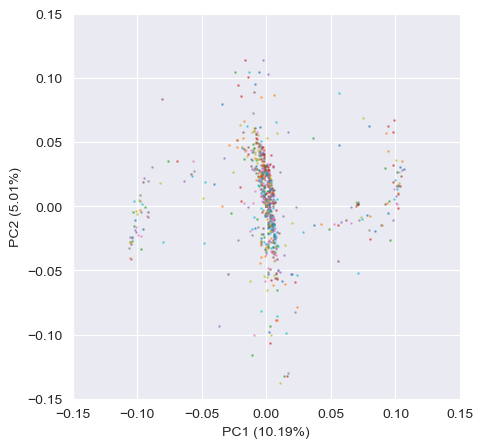

In [103]:
pcs = pca.components_

plt.figure(figsize=(5, 5))
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)")
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    plt.scatter([0, x], [0, y], s=0.8, alpha=0.5)

# plt.savefig("../images/biplot_pca.png")
plt.show()

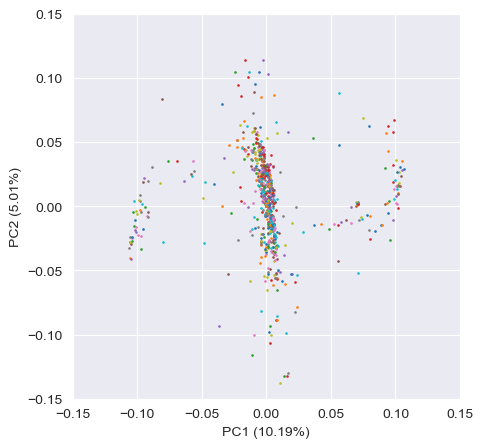

In [56]:
pcs = pca.components_

plt.figure(figsize=(5, 5))
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)")
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    plt.scatter([0, x], [0, y], s=0.8)
plt.show()

In [58]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2))

NameError: name 'cluster' is not defined

In [59]:
pca_scores = PCA().fit_transform(X_scaled)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2))

NameError: name 'PCA' is not defined

In [60]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

ModuleNotFoundError: No module named 'plotly'

### Determine the Explained Variance

In [15]:
pca.explained_variance_ratio_

array([0.11633078, 0.04561456, 0.03052545, 0.01788935, 0.01452156,
       0.01353796, 0.0107441 , 0.00792006, 0.00669089, 0.0056969 ,
       0.00492581, 0.00449132, 0.00429554, 0.00398293, 0.00380152,
       0.00361098, 0.00333201, 0.00316772, 0.00314459, 0.00310312])

In [68]:
pca.explained_variance_ratio_

array([0.09023084, 0.04435458, 0.02898306, 0.01704717, 0.01481063,
       0.01368144, 0.01225845, 0.01048634, 0.00833601, 0.00716223,
       0.00617097, 0.00504525, 0.00478248, 0.00456127, 0.00431163,
       0.00391847, 0.00377737, 0.00371009, 0.00366188, 0.00357122])

In [62]:
pca.explained_variance_ratio_.shape

(5,)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (15,) and arg 1 with shape (5,).

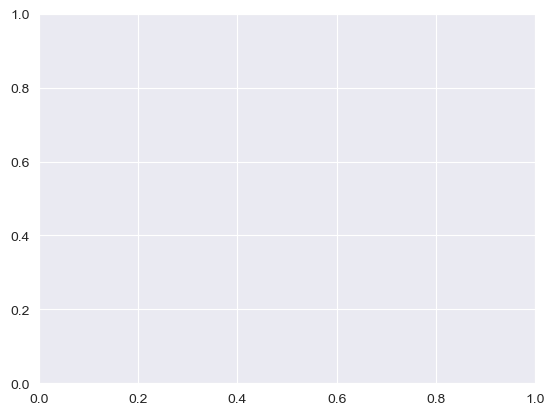

In [63]:
plt.bar(np.arange(15), pca.explained_variance_ratio_)
plt.xlim([-1, 11])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

### Visualize the Principal Component